In [9]:
#cleaning dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning

file = pd.read_csv('C:/Users/BIJAN/Desktop/dataset.csv')
file["Date"] = pd.to_datetime(file["Date time"])
file["Year"] = file["Date"].dt.year
file["Month"] = file["Date"].dt.month
file["Day"] = file["Date"].dt.dayofyear
file = file.drop(["Date time","Date","Heat Index","Wind Chill","Precipitation Cover","Snow Depth","Conditions","Minimum Temperature","Maximum Temperature","Dew Point","Wind Speed","Wind Gust","Wind Direction","Visibility","Cloud Cover","Sea Level Pressure","Weather Type","Latitude","Longitude","Resolved Address","Name","Info","Address"], axis=1)

file = file.dropna()


print(file)

      Temperature  Relative Humidity  Precipitation  Year  Month  Day
0            19.9              82.47            0.0  2017      1    1
1            20.6              76.76            0.0  2017      1    2
2            21.1              73.12            0.0  2017      1    3
3            19.9              72.57            0.0  2017      1    4
4            19.6              71.88            0.0  2017      1    5
...           ...                ...            ...   ...    ...  ...
2186         24.9              80.08            0.0  2022     12  361
2187         22.7              76.56            0.0  2022     12  362
2188         20.0              60.60            0.0  2022     12  363
2189         20.2              67.41            0.0  2022     12  364
2190         21.1              74.46            0.0  2022     12  365

[2191 rows x 6 columns]


In [10]:
#preping dataset 

column = ["Temperature", "Relative Humidity", "Year", "Month", "Day"]
f = ["F_Temp", "F_Hum"]
file["F_Temp"] = file["Temperature"].shift(-1)
file["F_Hum"] = file["Relative Humidity"].shift(-1)
file = file.dropna()

print(file)

      Temperature  Relative Humidity  Precipitation  Year  Month  Day  F_Temp  \
0            19.9              82.47            0.0  2017      1    1    20.6   
1            20.6              76.76            0.0  2017      1    2    21.1   
2            21.1              73.12            0.0  2017      1    3    19.9   
3            19.9              72.57            0.0  2017      1    4    19.6   
4            19.6              71.88            0.0  2017      1    5    18.5   
...           ...                ...            ...   ...    ...  ...     ...   
2185         25.2              75.02            0.0  2022     12  360    24.9   
2186         24.9              80.08            0.0  2022     12  361    22.7   
2187         22.7              76.56            0.0  2022     12  362    20.0   
2188         20.0              60.60            0.0  2022     12  363    20.2   
2189         20.2              67.41            0.0  2022     12  364    21.1   

      F_Hum  
0     76.76  

In [11]:
#splitting dataset

X = file[column]
Y = file[f]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=69)

print(X_train, X_test, Y_train, Y_test)

      Temperature  Relative Humidity  Year  Month  Day
692          21.5              68.59  2018     11  328
2165         21.7              66.24  2022     12  340
1505         24.1              73.64  2021      2   45
1260         28.3              94.28  2020      6  166
151          31.4              76.28  2017      6  152
...           ...                ...   ...    ...  ...
1208         26.7              84.74  2020      4  114
1033         25.7              79.54  2019     10  304
278          28.9              79.09  2017     10  279
439          27.8              66.25  2018      3   75
1626         28.4              92.55  2021      6  166

[1642 rows x 5 columns]       Temperature  Relative Humidity  Year  Month  Day
1317         30.8              86.91  2020      8  223
430          26.8              44.01  2018      3   66
1516         27.3              53.88  2021      2   56
160          30.7              76.21  2017      6  161
1221         26.9              84.98  20

In [12]:
#training model

base = RandomForestRegressor(n_estimators=500)
model = RegressorChain(base)

model.fit(X_train, Y_train)


,estimator,RandomForestR...stimators=500)
,order,None
,cv,None
,random_state,None
,verbose,False
,base_estimator,'deprecated'
,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [13]:
#testing model

y_pred = model.predict(X_test)


for i in range(5):
    print(f"Actual: {Y_test.iloc[i].values}, Predicted: {y_pred[i]}")

Actual: [31.2  88.57], Predicted: [30.4286 87.3617]
Actual: [26.  45.5], Predicted: [25.7422  53.38984]
Actual: [27.7  61.29], Predicted: [27.3666  59.65208]
Actual: [29.2  84.39], Predicted: [30.9718  74.79142]
Actual: [28.4  81.81], Predicted: [27.125   84.51508]


In [14]:
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))

14.712765851958775
0.824985192692422


In [15]:
for i, col in enumerate(f):
    mse = mean_squared_error(Y_test[col], y_pred[:, i])
    r2 = r2_score(Y_test[col], y_pred[:, i])

    print(f"\n  {col}")
    print(f" MSE: {mse:.2f}")
    print(f" R²: {r2:.2f}")


  F_Temp
 MSE: 1.34
 R²: 0.93

  F_Hum
 MSE: 28.08
 R²: 0.72


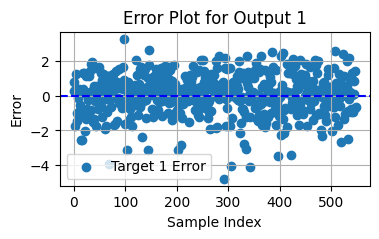

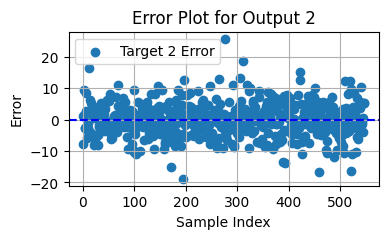

In [16]:

errors = np.array(Y_test) - np.array(y_pred)

for i in range(errors.shape[1]):  # for each target
    plt.figure(figsize=(4, 2))
    plt.scatter(range(len(Y_test)), errors[:, i], marker='o', label=f'Target {i+1} Error')
    plt.axhline(y=0, color='blue', linestyle='--')
    plt.title(f'Error Plot for Output {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:

# Save the model
joblib.dump(model, 'multi_output_model.pkl')

# Later you can load it
model = joblib.load('multi_output_model.pkl')

print("Dumped successfully")

Dumped successfully


In [23]:
warnings.filterwarnings(action='ignore', category=UserWarning)
year = int(input("Enter the year: "))
month = int(input("Enter the month: "))
day = int(input("Enter the day: "))
temp = int(input("Enter the temperature: "))
hum = int(input("Enter a humidity: "))

for i in range(5):
    va = [[temp, hum, year, month, day]] 
    pred = model.predict(va)
    temp = pred[0][0]
    hum = pred[0][1]
    print(i+1,"->  Temperature: ",int (temp), "Humidity: ",int(hum))
    day=day+1
    

Enter the year:  2025
Enter the month:  6
Enter the day:  173
Enter the temperature:  32
Enter a humidity:  54


1 ->  Temperature:  30 Humidity:  64
2 ->  Temperature:  30 Humidity:  67
3 ->  Temperature:  30 Humidity:  70
4 ->  Temperature:  30 Humidity:  72
5 ->  Temperature:  30 Humidity:  73
